In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [77]:
%cd ~

/home/mingju


In [78]:
%cd ./PreprocessDB/promoter_table

/home/mingju/PreprocessDB/promoter_table


In [79]:
import os
os.getcwd()

'/home/mingju/PreprocessDB/promoter_table'

In [81]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level"]

In [82]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/promoter_regions_pcg_250bp_sorted.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [83]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0
...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0


In [84]:
promoter_like_open['openChromatin_OC'] = 'NA'

In [85]:
promoter_like_open['ChromHMM_OC'] = 'NA'

In [86]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,ChromHMM_OC
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,NA,NA
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,NA,NA
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,NA,NA
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NA,NA
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,NA,NA
...,...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,NA,NA
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,NA,NA
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,NA,NA
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,NA,NA


In [87]:
promoter_like_open.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OC/promoter_like_regions_OC_openchromatin_chromHMM_uniq',sep='\t',header=False,index=False)

## promoter overlap with Hi-C

In [88]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OC/promoter_like_regions_OC_openchromatin_chromHMM_uniq -b /mnt/10T-backup-mingju/ifar/Hi-C/OC/OC_merge_hic.txt_sorted_lexicographical_addchr -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OC/promoter_like_regions_OC_openchromatin_chromHMM_HiC.bed 

In [89]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'openChromatin_OC','chromHMM_OC','chr_hic','start_hic','end_hic','HiC_OC','overlap']

In [90]:
promoter_like_open_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OC/promoter_like_regions_OC_openchromatin_chromHMM_HiC.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [91]:
promoter_like_open_chromHMM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,chromHMM_OC,chr_hic,start_hic,end_hic,HiC_OC,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,NaN,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,NaN,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,NaN,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NaN,NaN,chr1,922000,924000,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...,327
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NaN,NaN,chr1,922000,924000,P:1:922000:924000;D:1:912000:914000;GOTHIC:rea...,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364579,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,NaN,NaN,.,-1,-1,.,0
3364580,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,NaN,NaN,.,-1,-1,.,0
3364581,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,NaN,NaN,.,-1,-1,.,0
3364582,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,NaN,NaN,.,-1,-1,.,0


In [92]:
promoter_like_open_chromHMM.drop_duplicates(inplace=True)

In [93]:
len(promoter_like_open_chromHMM)

3364584

In [94]:
# Define the columns to group by (Chrom to chromHMM_myotube)
group_cols = promoter_like_open_chromHMM.columns[:10]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level', 'openChromatin_OC', 'chromHMM_OC'],
      dtype='object')


In [95]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open_chromHMM.groupby(list(group_cols), dropna=False)['HiC_OC'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [96]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,chromHMM_OC,HiC_OC
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,NaN,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,NaN,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,NaN,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...
...,...,...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,NaN,NaN,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,NaN,NaN,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,NaN,NaN,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,NaN,NaN,.


In [97]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,chromHMM_OC,HiC_OC
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,NaN,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,NaN,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,NaN,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,NaN,NaN,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,NaN,NaN,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,NaN,NaN,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,NaN,NaN,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,NaN,NaN,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...


# add TPM from RNA-seq

In [99]:
gene_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/Osteocytes/nf_results/star_rsem/rsem.merged.gene_tpm.tsv',sep='\t')

In [100]:
gene_map =pd.read_csv('./geneid2name.csv')
gene_tpm = gene_tpm.merge(
    gene_map,
    on="gene_id",
    how="left"
)

In [101]:
gene_tpm = gene_tpm[gene_tpm["gene_name"].notna()].reset_index(drop=True)

In [102]:
gene_tpm

,gene_id,transcript_id(s),osteocyte,gene_name
0,ENSG00000000003,"ENST00000373020,ENST00000494424,ENST0000049677...",11.28,TSPAN6
1,ENSG00000000005,"ENST00000373031,ENST00000485971",0.72,TNMD
2,ENSG00000000419,"ENST00000371582,ENST00000371584,ENST0000037158...",58.45,DPM1
3,ENSG00000000457,"ENST00000367770,ENST00000367771,ENST0000036777...",2.99,SCYL3
4,ENSG00000000460,"ENST00000286031,ENST00000359326,ENST0000041381...",4.40,FIRRM
...,...,...,...,...
19469,ENSG00000292373,"ENST00000711286,ENST00000711288,ENST0000071128...",0.04,IL9R
19470,ENSG00000293137,ENST00000438684,2.39,MSL3B
19471,ENSG00000293542,"ENST00000473072,ENST00000713561",0.00,DUSP13B
19472,ENSG00000293543,"ENST00000308475,ENST00000372702,ENST0000047988...",0.00,DUSP13A


In [103]:
gene_tpm = gene_tpm.rename(columns={'osteocyte':"GeneTPM_OC"})

In [104]:
gene_tpm = gene_tpm[['GeneTPM_OC','gene_name']]

In [105]:
collapsed_df = collapsed_df.merge(
    gene_tpm,
    left_on="Gene",
    right_on="gene_name",
    how="left"
).drop(columns=['gene_name'])

In [106]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,chromHMM_OC,HiC_OC,GeneTPM_OC
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,NaN,NaN,.,0.00
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,NaN,NaN,.,0.00
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,NaN,NaN,.,0.00
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...,2.03
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...
170934,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,NaN,NaN,.,10.08
170935,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,NaN,NaN,.,10.08
170936,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,NaN,NaN,.,10.08
170937,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2.0,NaN,NaN,.,10.08


In [107]:
collapsed_df['GeneTPM_OC'].isna().value_counts()

GeneTPM_OC
False    170939
Name: count, dtype: int64

In [108]:
tx_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/Osteocytes/nf_results/star_rsem/rsem.merged.transcript_tpm.tsv',sep='\t')

In [109]:
tx_tpm

,transcript_id,gene_id,osteocyte
0,ENST00000373020,ENSG00000000003,9.65
1,ENST00000494424,ENSG00000000003,1.17
2,ENST00000496771,ENSG00000000003,0.46
3,ENST00000612152,ENSG00000000003,0.00
4,ENST00000373031,ENSG00000000005,0.72
...,...,...,...
387939,ENST00000850736,ENSG00000310556,0.00
387940,ENST00000850818,ENSG00000310557,0.00
387941,ENST00000850819,ENSG00000310557,0.00
387942,ENST00000850820,ENSG00000310557,0.00


In [110]:
tx_tpm = tx_tpm.rename(columns={'osteocyte':"TranscriptTPM_OC"})

In [111]:
collapsed_df['Transcript'] = collapsed_df['Transcript'].str.split(".").str[0]

In [112]:
collapsed_df = collapsed_df.merge(
    tx_tpm,
    left_on="Transcript",
    right_on="transcript_id",
    how="left"
).drop(columns=['transcript_id','gene_id'])

In [113]:
collapsed_df['TranscriptTPM_OC'].isna().value_counts()

TranscriptTPM_OC
False    170939
Name: count, dtype: int64

# update the promoter evidence Type

In [131]:
collapsed_df["transcript_support_level"] = (
    collapsed_df["transcript_support_level"]
        .fillna(0)
        .astype(int)
)

In [134]:
def classify_promoter_type(row):
    score = 0
    sources = []  # track where score comes from

    # Open chromatin evidence (Essential)
    open_chrom = row['openChromatin_OC']
    if isinstance(open_chrom, str) and open_chrom != ".":
        if 'ATAC' in open_chrom and 'DNase' in open_chrom:
            score += 3
            sources.append("OpenChromatin:ATAC+DNase(+3)")
        else:
            score += 2
            sources.append("OpenChromatin:ATAC/DNase(+2)")

    # ChromHMM evidence (Essential)
    chromhmm = row['chromHMM_OC']
    if isinstance(chromhmm, str) and chromhmm != ".":
        active_states = ['TssA', 'PromU', 'PromP', '1_Tss', '2_Prom']
        if any(state in chromhmm for state in active_states):
            score += 2
            sources.append("ChromHMM:ActivePromoter(+2)")

    # Expression evidence
    transcript_tpm = row.get('TranscriptTPM_OC', 0)
    gene_tpm = row.get('GeneTPM_OC', 0)

    if transcript_tpm > 1:
        score += 2
        sources.append("TranscriptTPM>1(+2)")
    elif transcript_tpm > 0:
        score += 1
        sources.append("TranscriptTPM>0(+1)")
    elif gene_tpm > 1:
        score += 1
        sources.append("GeneTPM>1(+1)")

    # Transcript support level
    tsl = str(row['transcript_support_level'])
    if tsl in ['1', '2']:
        score += 1
        sources.append("TSL1-2(+1)")

    # Optional Hi-C
    # hic = row.get('HiC_hMSC')
    # if isinstance(hic, str) and hic != '.':
    #     score += 1
    #     sources.append("HiC(+1)")

    # Final classification
    if score >= 6:
        promoter_type = 'very_high'
    elif score >= 4:
        promoter_type = 'high'
    elif score >= 2:
        promoter_type = 'moderate'
    else:
        promoter_type = 'low'

    return promoter_type, score, "; ".join(sources)


In [135]:
collapsed_df[["Type", "score", "score_source"]] = (
    collapsed_df
        .apply(classify_promoter_type, axis=1, result_type="expand")
)

In [137]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_OC,chromHMM_OC,HiC_OC,GeneTPM_OC,TranscriptTPM_OC,Type,score,score_source
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,0,NaN,NaN,.,0.00,0.00,low,0,
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,0,NaN,NaN,.,0.00,0.00,low,0,
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,0,NaN,NaN,.,0.00,0.00,low,0,
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...,2.03,0.00,low,1,GeneTPM>1(+1)
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5,NaN,NaN,P:1:922000:924000;D:1:906000:908000;GOTHIC:rea...,2.03,0.10,low,1,TranscriptTPM>0(+1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170934,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2,NaN,NaN,.,10.08,0.12,moderate,2,TranscriptTPM>0(+1); TSL1-2(+1)
170935,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,NaN,NaN,.,10.08,3.59,moderate,3,TranscriptTPM>1(+2); TSL1-2(+1)
170936,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1,NaN,NaN,.,10.08,3.59,moderate,3,TranscriptTPM>1(+2); TSL1-2(+1)
170937,chrY,57210341,57210841,ENST00000711285,57210591,WASH6P,+,2,NaN,NaN,.,10.08,0.00,moderate,2,GeneTPM>1(+1); TSL1-2(+1)


In [138]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OC/promoter_like_regions_OC_openchromatin_chromHMM_HiC_level.tsv',sep='\t',index=False)

In [136]:
collapsed_df['Type'].value_counts(normalize=True) * 100

Type
low         59.825435
moderate    40.174565
Name: proportion, dtype: float64

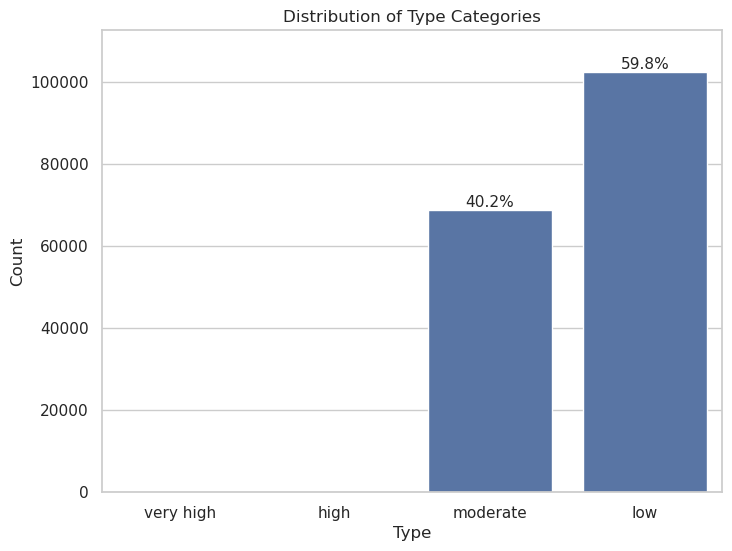

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Calculate counts and percentages
counts = collapsed_df['Type'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(2)

# Desired order
type_order = ['very high', 'high', 'moderate', 'low']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=collapsed_df, x='Type', order=type_order)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    label = p.get_x() + p.get_width() / 2
    category = p.get_x() + p.get_width() / 2
    type_name = p.get_x() + p.get_width() / 2
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

# Labels
plt.title('Distribution of Type Categories')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)  # Add some space above bars

plt.show()
